In [1]:
import Utils as u
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth',None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<ol>
    <li>Read-In Data</li>
    <li>Scale Data</li>
    <li>Identify Cluster Number</li>
    <ol><li>Elbow Method</li>
        <li>Silhouette Method</li>
        <li>Calinski_harabasz</li></ol>
    <li>Run K-Means</li>
    <li>Validate Result</li></ol>
    

#### Read-In/Prep Data

In [2]:
df_coll_f, df_coll_f_labels = u.get_updated_data('college_data.csv',['INSTNM', 'opeid6', 'UNITID', 'OPEID'])
df_coll_f.head()

,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,DEBT_MDN,DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,...,PCIP42CDR3,PCIP43CDR3,PCIP44CDR3,PCIP45CDR3,PCIP46CDR3,PCIP47CDR3,PCIP48CDR3,PCIP49CDR3,PCIP50CDR3,PCIP51CDR3,PCIP52CDR3,PCIP54CDR3,PCIP01APPL_SCH_PCT_GE2,PCIP03APPL_SCH_PCT_GE2,PCIP04APPL_SCH_PCT_GE2,PCIP05APPL_SCH_PCT_GE2,PCIP09APPL_SCH_PCT_GE2,PCIP10APPL_SCH_PCT_GE2,PCIP11APPL_SCH_PCT_GE2,PCIP12APPL_SCH_PCT_GE2,PCIP13APPL_SCH_PCT_GE2,PCIP14APPL_SCH_PCT_GE2,PCIP15APPL_SCH_PCT_GE2,PCIP16APPL_SCH_PCT_GE2,PCIP19APPL_SCH_PCT_GE2,PCIP22APPL_SCH_PCT_GE2,PCIP23APPL_SCH_PCT_GE2,PCIP24APPL_SCH_PCT_GE2,PCIP25APPL_SCH_PCT_GE2,PCIP26APPL_SCH_PCT_GE2,PCIP27APPL_SCH_PCT_GE2,PCIP29APPL_SCH_PCT_GE2,PCIP30APPL_SCH_PCT_GE2,PCIP31APPL_SCH_PCT_GE2,PCIP38APPL_SCH_PCT_GE2,PCIP39APPL_SCH_PCT_GE2,PCIP40APPL_SCH_PCT_GE2,PCIP41APPL_SCH_PCT_GE2,PCIP42APPL_SCH_PCT_GE2,PCIP43APPL_SCH_PCT_GE2,PCIP44APPL_SCH_PCT_GE2,PCIP45APPL_SCH_PCT_GE2,PCIP46APPL_SCH_PCT_GE2,PCIP47APPL_SCH_PCT_GE2,PCIP48APPL_SCH_PCT_GE2,PCIP49APPL_SCH_PCT_GE2,PCIP50APPL_SCH_PCT_GE2,PCIP51APPL_SCH_PCT_GE2,PCIP52APPL_SCH_PCT_GE2,PCIP54APPL_SCH_PCT_GE2
0,0.756400,0.599917,0.476053,0.368704,0.163,19500.0,19500.0,373.156554,33611.5,0.389902,0.378214,0.011688,0.610098,0.0397,0.0199,0.0116,0.0000,0.0000,0.0348,0.0348,0.0,0.1490,0.1175,0.0348,0.0000,0.0281,0.0,0.0182,0.0546,0.0,0.1026,0.0199,0.0,0.0000,0.0000,0.0000,0.0,0.0248,0.0,0.0579,0.0050,0.0364,0.0480,0.0,0.0,0.0,0.0,0.0166,0.0000,0.1457,...,0.009438,0.000815,0.005933,0.007824,0.0,0.0,0.0,0.0,0.002706,0.000000,0.023749,0.000000,0.030029,0.015052,0.008774,0.000000,0.000000,0.026323,0.026323,0.0,0.112704,0.088877,0.026323,0.000000,0.021255,0.0,0.013766,0.041299,0.0,0.077607,0.015052,0.0,0.000000,0.00000,0.000000,0.0,0.018759,0.0,0.043796,0.003782,0.027533,0.036307,0.0,0.0,0.0,0.0,0.012556,0.000000,0.110207,0.000000
1,0.536362,0.288334,0.177437,0.111324,0.080,16250.0,16250.0,256.646090,23117.0,0.345362,0.322230,0.023132,0.654638,0.0000,0.0000,0.0000,0.0018,0.0456,0.0000,0.0099,0.0,0.0862,0.0632,0.0000,0.0090,0.0000,0.0,0.0203,0.0262,0.0,0.0619,0.0135,0.0,0.0000,0.0000,0.0095,0.0,0.0181,0.0,0.0840,0.0280,0.0244,0.0501,0.0,0.0,0.0,0.0,0.0415,0.2090,0.1765,...,0.006720,0.002240,0.001952,0.004008,0.0,0.0,0.0,0.0,0.003320,0.016720,0.014120,0.001696,0.000000,0.000000,0.000000,0.000965,0.024458,0.000000,0.005310,0.0,0.046234,0.033898,0.000000,0.004827,0.000000,0.0,0.010888,0.014053,0.0,0.033201,0.007241,0.0,0.000000,0.00000,0.005095,0.0,0.009708,0.0,0.045054,0.015018,0.013087,0.026872,0.0,0.0,0.0,0.0,0.022259,0.112100,0.094668,0.011371
2,0.558945,0.270941,0.158221,0.093588,0.077,16500.0,16500.0,274.642513,24738.0,0.337619,0.314142,0.023477,0.662381,0.0000,0.0000,0.0000,0.0000,0.0318,0.0000,0.0273,0.0,0.0173,0.2566,0.0000,0.0173,0.0000,0.0,0.0309,0.0000,0.0,0.0855,0.0218,0.0,0.0000,0.0000,0.0082,0.0,0.0209,0.0,0.0218,0.0000,0.0000,0.0173,0.0,0.0,0.0,0.0,0.0346,0.1720,0.2247,...,0.001679,0.000000,0.000000,0.001332,0.0,0.0,0.0,0.0,0.002664,0.013244,0.017302,0.000909,0.000000,0.000000,0.000000,0.000000,0.017774,0.000000,0.015259,0.0,0.009670,0.143425,0.000000,0.009670,0.000000,0.0,0.017271,0.000000,0.0,0.047790,0.012185,0.0,0.000000,0.00000,0.004583,0.0,0.011682,0.0,0.012185,0.000000,0.000000,0.009670,0.0,0.0,0.0,0.0,0.019340,0.096139,0.125595,0.006596
3,0.680323,0.516444,0.399108,0.305741,0.191,15854.5,15854.5,371.385777,33452.0,0.377665,0.361438,0.016227,0.622335,0.0000,0.0000,0.0000,0.0000,0.0733,0.0000,0.0450,0.0,0.2150,0.0000,0.0000,0.0000,0.0000,0.0,0.0183,0.0000,0.0,0.1033,0.0183,0.0,0.0000,0.0183,0.0000,0.0,0.0150,0.0,0.0617,0.1183,0.0650,0.0150,0.0,0.0,0.0,0.0,0.0567,0.0633,0.1067,...,0.0

#### Scale Data

In [3]:
scaler = StandardScaler()

In [4]:
df_coll_f_scaled = u.scale_data(df_coll_f,scaler)

In [5]:
df_coll_f_scaled.head()

,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,DEBT_MDN,DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,...,PCIP42CDR3,PCIP43CDR3,PCIP44CDR3,PCIP45CDR3,PCIP46CDR3,PCIP47CDR3,PCIP48CDR3,PCIP49CDR3,PCIP50CDR3,PCIP51CDR3,PCIP52CDR3,PCIP54CDR3,PCIP01APPL_SCH_PCT_GE2,PCIP03APPL_SCH_PCT_GE2,PCIP04APPL_SCH_PCT_GE2,PCIP05APPL_SCH_PCT_GE2,PCIP09APPL_SCH_PCT_GE2,PCIP10APPL_SCH_PCT_GE2,PCIP11APPL_SCH_PCT_GE2,PCIP12APPL_SCH_PCT_GE2,PCIP13APPL_SCH_PCT_GE2,PCIP14APPL_SCH_PCT_GE2,PCIP15APPL_SCH_PCT_GE2,PCIP16APPL_SCH_PCT_GE2,PCIP19APPL_SCH_PCT_GE2,PCIP22APPL_SCH_PCT_GE2,PCIP23APPL_SCH_PCT_GE2,PCIP24APPL_SCH_PCT_GE2,PCIP25APPL_SCH_PCT_GE2,PCIP26APPL_SCH_PCT_GE2,PCIP27APPL_SCH_PCT_GE2,PCIP29APPL_SCH_PCT_GE2,PCIP30APPL_SCH_PCT_GE2,PCIP31APPL_SCH_PCT_GE2,PCIP38APPL_SCH_PCT_GE2,PCIP39APPL_SCH_PCT_GE2,PCIP40APPL_SCH_PCT_GE2,PCIP41APPL_SCH_PCT_GE2,PCIP42APPL_SCH_PCT_GE2,PCIP43APPL_SCH_PCT_GE2,PCIP44APPL_SCH_PCT_GE2,PCIP45APPL_SCH_PCT_GE2,PCIP46APPL_SCH_PCT_GE2,PCIP47APPL_SCH_PCT_GE2,PCIP48APPL_SCH_PCT_GE2,PCIP49APPL_SCH_PCT_GE2,PCIP50APPL_SCH_PCT_GE2,PCIP51APPL_SCH_PCT_GE2,PCIP52APPL_SCH_PCT_GE2,PCIP54APPL_SCH_PCT_GE2
0,1.403006,1.477092,1.380338,1.244780,0.402488,0.888589,0.888589,1.493648,1.493648,-0.217273,0.024151,-0.971860,0.217273,1.189434,0.682661,0.316344,-0.150772,-0.598132,0.832683,-0.128539,-0.184156,1.568593,1.590114,0.086187,-0.451434,0.549216,-0.222497,0.146427,-0.209041,-0.069813,1.705797,1.336297,-0.02803,-0.353435,-0.394791,-0.207929,-0.146468,0.727549,-0.117583,0.275430,-0.559289,0.611797,0.230305,-0.173045,-0.209196,-0.230143,-0.108164,-0.262932,-0.806074,-0.169014,...,0.514435,-0.496825,0.812639,0.977040,-0.176972,-0.192548,-0.227448,-0.128778,-0.176553,-0.668965,0.023505,-0.478883,1.626791,0.947519,0.420021,-0.216140,-0.557216,1.674233,0.166753,-0.188809,2.093038,1.866382,0.579521,-0.426217,0.843544,-0.198853,0.210349,-0.036923,-0.07113,1.903938,1.495124,-0.032636,-0.370511,-0.427240,-0.242166,-0.152716,0.800936,-0.115454,0.479508,-0.506087,0.901425,0.293886,-0.190457,-0.22361,-0.235913,-0.108691,-0.215402,-0.825412,0.158498,-0.553174
1,0.012489,-0.211603,-0.310202,-0.379285,-0.649753,0.323181,0.323181,0.186481,0.186481,-0.593868,-0.535307,-0.576238,0.593868,-0.184994,-0.237197,-0.092130,-0.030636,0.752523,-0.142006,-0.376635,-0.184156,0.638864,0.740530,-0.366477,0.349120,-0.263012,-0.222497,0.232293,-0.379111,-0.069813,0.773523,0.729477,-0.02803,-0.353435,-0.394791,0.240972,-0.146468,0.437127,-0.117583,0.647114,-0.246764,0.292371,0.264156,-0.173045,-0.209196,-0.230143,-0.108164,-0.073568,0.013889,0.002151,...,0.272277,-0.394295,0.056809,0.283951,-0.176972,-0.192548,-0.227448,-0.128778,-0.146581,-0.291920,-0.289245,0.677575,-0.170401,-0.256861,-0.099785,-0.075499,0.463831,-0.161291,-0.414327,-0.188809,0.497768,0.563109,-0.406360,0.177273,-0.257775,-0.198853,0.049519,-0.350569,-0.07113,0.464416,0.445609,-0.032636,-0.370511,-0.427240,0.175693,-0.152716,0.258227,-0.115454,0.510881,-0.196086,0.246688,0.083056,-0.190457,-0.22361,-0.235913,-0.108691,-0.094129,0.127650,-0.003945,0.389286
2,0.155204,-0.305870,-0.418985,-0.491199,-0.687786,0.366674,0.366674,0.388388,0.388388,-0.659339,-0.616131,-0.564321,0.659339,-0.184994,-0.237197,-0.092130,-0.150772,0.343772,-0.142006,-0.203267,-0.184156,-0.381173,3.766489,-0.366477,1.087408,-0.263012,-0.222497,0.665716,-0.536006,-0.069813,1.314104,1.516446,-0.02803,-0.353435,-0.394791,0.179543,-0.146468,0.558497,-0.117583,-0.238662,-0.627229,-0.357129,-0.264570,-0.173045,-0.209196,-0.230143,-0.108164,-0.126042,-0.131272,0.270012,...,-0.176932,-0.555465,-0.313777,-0.202065,-0.176972,-0.192548,-0.227448,-0.128778,-0.178583,-0.370306,-0.185898,0.140667,-0

#### Identify Cluster Number

In [6]:
model = KMeans(random_state=2020)

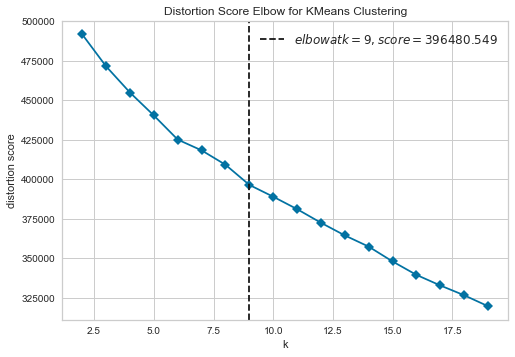

In [75]:
u.show_num_elbow_clusters(df_coll_f_scaled,model)

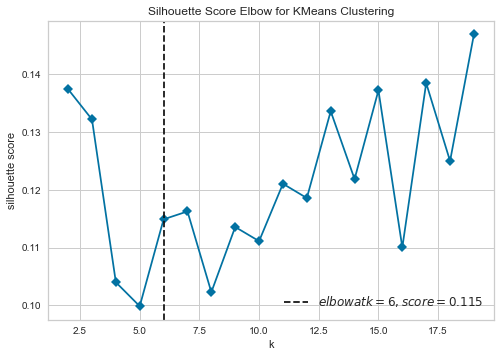

In [76]:
u.show_num_elbow_clusters(df_coll_f_scaled,model,'silhouette')

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


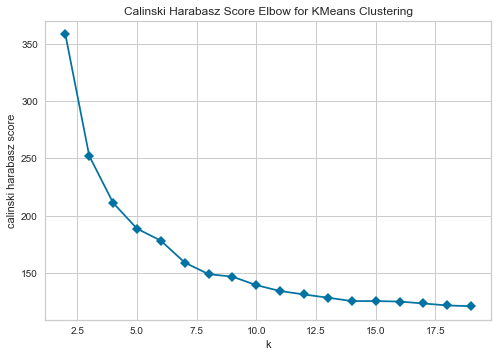

In [18]:
u.show_num_elbow_clusters(df_coll_f_scaled,model,'calinski_harabasz')

#### Run K-Means

In [70]:
model = KMeans (n_clusters = 6, algorithm='full',random_state=2020)
df_coll_clus = u.find_k_means_clusters(df_coll_f_scaled, df_coll_f_labels,model,scaler)

In [71]:
pd.pivot_table(df_coll_clus,index=['Clusters'],values='INSTNM',aggfunc='count')

,INSTNM
Clusters,
0,643
1,344
2,1020
3,148
4,129
5,783


In [47]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 2,'INSTNM'])
sorted(group)

['Abilene Christian University',
 'Adelphi University',
 'Adrian College',
 'Alabama A & M University',
 'Alabama State University',
 'Alaska Pacific University',
 'Albany State University',
 'Albertus Magnus College',
 'Alcorn State University',
 'Alderson Broaddus University',
 'Alfred University',
 'Alliant International University',
 'Alvernia University',
 'Alverno College',
 'American International College',
 'Anderson University',
 'Anderson University',
 'Andrew College',
 'Angelo State University',
 'Anna Maria College',
 'Antioch University-Midwest',
 'Appalachian State University',
 'Argosy University-Phoenix',
 'Argosy University-Phoenix Online Division',
 'Argosy University-Sarasota',
 'Arizona Christian University',
 'Arizona State University-Downtown Phoenix',
 'Arizona State University-Skysong',
 'Arizona State University-Tempe',
 'Arizona State University-West',
 'Arkansas Baptist College',
 'Arkansas State University-Main Campus',
 'Arkansas Tech University',
 'Arling

In [13]:
df_coll_clus.head()

,key_0,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,DEBT_MDN,DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,...,PCIP47CDR3,PCIP48CDR3,PCIP49CDR3,PCIP50CDR3,PCIP51CDR3,PCIP52CDR3,PCIP54CDR3,PCIP01APPL_SCH_PCT_GE2,PCIP03APPL_SCH_PCT_GE2,PCIP04APPL_SCH_PCT_GE2,PCIP05APPL_SCH_PCT_GE2,PCIP09APPL_SCH_PCT_GE2,PCIP10APPL_SCH_PCT_GE2,PCIP11APPL_SCH_PCT_GE2,PCIP12APPL_SCH_PCT_GE2,PCIP13APPL_SCH_PCT_GE2,PCIP14APPL_SCH_PCT_GE2,PCIP15APPL_SCH_PCT_GE2,PCIP16APPL_SCH_PCT_GE2,PCIP19APPL_SCH_PCT_GE2,PCIP22APPL_SCH_PCT_GE2,PCIP23APPL_SCH_PCT_GE2,PCIP24APPL_SCH_PCT_GE2,PCIP25APPL_SCH_PCT_GE2,PCIP26APPL_SCH_PCT_GE2,PCIP27APPL_SCH_PCT_GE2,PCIP29APPL_SCH_PCT_GE2,PCIP30APPL_SCH_PCT_GE2,PCIP31APPL_SCH_PCT_GE2,PCIP38APPL_SCH_PCT_GE2,PCIP39APPL_SCH_PCT_GE2,PCIP40APPL_SCH_PCT_GE2,PCIP41APPL_SCH_PCT_GE2,PCIP42APPL_SCH_PCT_GE2,PCIP43APPL_SCH_PCT_GE2,PCIP44APPL_SCH_PCT_GE2,PCIP45APPL_SCH_PCT_GE2,PCIP46APPL_SCH_PCT_GE2,PCIP47APPL_SCH_PCT_GE2,PCIP48APPL_SCH_PCT_GE2,PCIP49APPL_SCH_PCT_GE2,PCIP50APPL_SCH_PCT_GE2,PCIP51APPL_SCH_PCT_GE2,PCIP52APPL_SCH_PCT_GE2,PCIP54APPL_SCH_PCT_GE2,Clusters,INSTNM,opeid6,UNITID,OPEID
0,0,0.756400,0.599917,0.476053,0.368704,0.163,19500.0,19500.0,373.156554,33611.5,0.389902,0.378214,0.011688,0.610098,0.0397,0.0199,0.0116,0.0000,0.0000,0.0348,0.0348,0.0,0.1490,0.1175,0.0348,0.0000,2.810000e-02,0.0,0.0182,5.460000e-02,0.0,0.1026,0.0199,0.0,0.0000,1.734723e-18,0.0000,0.0,0.0248,0.0,0.0579,0.0050,0.0364,0.0480,0.0,0.0,0.0,0.0,0.0166,0.0000,...,0.0,0.0,0.0,0.002706,0.000000,0.023749,0.000000,0.030029,0.015052,0.008774,0.000000,-1.734723e-18,0.026323,0.026323,0.0,0.112704,0.088877,0.026323,0.000000,0.021255,0.0,0.013766,0.041299,0.0,0.077607,0.015052,-6.776264e-21,0.000000,0.00000,0.000000,8.673617e-19,0.018759,0.0,0.043796,0.003782,0.027533,0.036307,0.0,0.0,0.0,0.0,0.012556,0.000000,0.110207,0.000000,6,Alabama A & M University,1002,100654,100200
1,1,0.536362,0.288334,0.177437,0.111324,0.080,16250.0,16250.0,256.646090,23117.0,0.345362,0.322230,0.023132,0.654638,0.0000,0.0000,0.0000,0.0018,0.0456,0.0000,0.0099,0.0,0.0862,0.0632,0.0000,0.0090,1.734723e-18,0.0,0.0203,2.620000e-02,0.0,0.0619,0.0135,0.0,0.0000,1.734723e-18,0.0095,0.0,0.0181,0.0,0.0840,0.0280,0.0244,0.0501,0.0,0.0,0.0,0.0,0.0415,0.2090,...,0.0,0.0,0.0,0.003320,0.016720,0.014120,0.001696,0.000000,0.000000,0.000000,0.000965,2.445809e-02,0.000000,0.005310,0.0,0.046234,0.033898,0.000000,0.004827,0.000000,0.0,0.010888,0.014053,0.0,0.033201,0.007241,-6.776264e-21,0.000000,0.00000,0.005095,8.673617e-19,0.009708,0.0,0.045054,0.015018,0.013087,0.026872,0.0,0.0,0.0,0.0,0.022259,0.112100,0.094668,0.011371,6,University of Alabama at Birmingham,1052,100663,105200
2,2,0.558945,0.270941,0.158221,0.093588,0.077,16500.0,16500.0,274.642513,24738.0,0.337619,0.314142,0.023477,0.662381,0.0000,0.0000,0.0000,0.0000,0.0318,0.0000,0.0273,0.0,0.0173,0.2566,0.0000,0.0173,1.734723e-18,0.0,0.0309,1.387779e-17,0.0,0.0855,0.0218,0.0,0.0000,1.734723e-18,0.0082,0.0,0.0209,0.0,0.0218,0.0000,0.0000,0.0173,0.0,0.0,0.0,0.0,0.0346,0.1720,...,0.0,0.0,0.0,0.002664,0.013244,0.017302,0.000909,0.000000,0.000000,0.000000,0.000000,1.777446e-02,0.000000,0.015259,0.0,0.009670,0.143425,0.000000,0.009670,0.000000,0.0,0.017271,0.000000,0.0,0.047790,0.012185,-6.776264e-21,0.000000,0.00000,0.004583,8.673617e-19,0.011682,0.0,0.012185,0.000000,0.000000,0.009670,0.0,0.0,0.0,0.0,0.019340,0.096139,0.125595,0.006596,6,University of Alabama in Huntsville,1055,100706,105500
3,3,0.680323,0.516444,0.399108,0.305741,0.191,15854.5,15854.5,371.385777,33452.0,0.377665,0.361438,0.016227,0.622335,0.0000,0.0000,0.0000,0.0000,0.0733,0.0000,0.0450,0.0,0.2150,0.0000,0.0000,0.0000,1.734723e-18,0.0,0.0183,

#### Run DB-Scan

In [82]:
for eps_value in (.5*10**(-i) for i in range(1,5)):
    dbscan = DBSCAN(eps=eps_value,min_samples=100)
    print(dbscan.fit(df_coll_f_scaled))
    print(np.unique(dbscan.labels_))
    print('\n')

DBSCAN(min_samples=100)
[-1]


DBSCAN(eps=0.05, min_samples=100)
[-1]


DBSCAN(eps=0.005, min_samples=100)
[-1]


DBSCAN(eps=0.0005, min_samples=100)
[-1]


DBSCAN(eps=5e-05, min_samples=100)
[-1]




In [81]:
df_coll_clus.pivot_table(index='Clusters',aggfunc=np.median)

,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,DEBT_MDN,DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,OPEID,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP01APPL_SCH_PCT_GE2,PCIP01CDR3,PCIP01PAR_ED_PCT_1STGEN,PCIP03,PCIP03APPL_SCH_PCT_GE2,PCIP03CDR3,PCIP03PAR_ED_PCT_1STGEN,PCIP04,PCIP04APPL_SCH_PCT_GE2,PCIP04CDR3,PCIP04PAR_ED_PCT_1STGEN,PCIP05,PCIP05APPL_SCH_PCT_GE2,PCIP05CDR3,PCIP05PAR_ED_PCT_1STGEN,PCIP09,PCIP09APPL_SCH_PCT_GE2,PCIP09CDR3,PCIP09PAR_ED_PCT_1STGEN,PCIP10,PCIP10APPL_SCH_PCT_GE2,PCIP10CDR3,PCIP10PAR_ED_PCT_1STGEN,PCIP11,PCIP11APPL_SCH_PCT_GE2,PCIP11CDR3,PCIP11PAR_ED_PCT_1STGEN,PCIP12,PCIP12APPL_SCH_PCT_GE2,PCIP12CDR3,PCIP12PAR_ED_PCT_1STGEN,PCIP13,PCIP13APPL_SCH_PCT_GE2,PCIP13CDR3,PCIP13PAR_ED_PCT_1STGEN,...,PCIP45PAR_ED_PCT_1STGEN,PCIP46,PCIP46APPL_SCH_PCT_GE2,PCIP46CDR3,PCIP46PAR_ED_PCT_1STGEN,PCIP47,PCIP47APPL_SCH_PCT_GE2,PCIP47CDR3,PCIP47PAR_ED_PCT_1STGEN,PCIP48,PCIP48APPL_SCH_PCT_GE2,PCIP48CDR3,PCIP48PAR_ED_PCT_1STGEN,PCIP49,PCIP49APPL_SCH_PCT_GE2,PCIP49CDR3,PCIP49PAR_ED_PCT_1STGEN,PCIP50,PCIP50APPL_SCH_PCT_GE2,PCIP50CDR3,PCIP50PAR_ED_PCT_1STGEN,PCIP51,PCIP51APPL_SCH_PCT_GE2,PCIP51CDR3,PCIP51PAR_ED_PCT_1STGEN,PCIP52,PCIP52APPL_SCH_PCT_GE2,PCIP52CDR3,PCIP52PAR_ED_PCT_1STGEN,PCIP54,PCIP54APPL_SCH_PCT_GE2,PCIP54CDR3,PCIP54PAR_ED_PCT_1STGEN,PCTFLOAN,PCTPELL,PPTUG_EF,PREDDEG,UG25abv,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE,UNITID,key_0,opeid6
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.432432,0.219539,0.133366,0.086640,0.178,6812.0,6812.0,118.791935,10700.0,367100.0,0.485700,0.430233,0.043975,0.514300,0.0,0.0,0.0,0.0,0.0000,0.000000,5.421011e-20,0.000000,0.0,0.0,0.0,-1.084202e-19,0.00000,0.000000,0.000000,0.000000,0.00000,-1.734723e-18,2.168404e-19,-8.673617e-19,0.0,0.0,0.0,0.0,0.02220,0.009378,0.003990,0.010875,0.0,0.0,0.0,0.0,0.0090,0.003848,0.001260,0.004551,...,0.000000,0.0,0.0,0.0,0.0,0.0166,0.007028,0.002613,0.008292,0.0012,0.000586,0.000076,0.000588,0.0,0.0,0.0,0.0,0.0073,3.049653e-03,1.224500e-03,0.003496,0.2030,0.083514,0.034375,0.098169,0.0947,0.038658,0.016211,0.045742,0.00000,0.000000,0.000000,0.000000,0.25710,0.4173,0.48620,2.0,0.34470,0.02180,0.0052,0.01570,0.08720,0.07700,0.0014,0.00460,0.02530,0.62870,187046.0,1246.0,3671.0
1,0.766428,0.643986,0.558060,0.468715,0.038,19633.5,19633.5,277.551250,25000.0,262200.0,0.225202,0.209675,0.014692,0.774798,0.0,0.0,0.0,0.0,0.0078,0.006126,2.224000e-04,0.001815,0.0,0.0,0.0,-1.084202e-19,0.00565,0.004379,0.000179,0.001394,0.03685,2.874672e-02,1.277850e-03,9.311929e-03,0.0,0.0,0.0,0.0,0.01325,0.009801,0.000425,0.002910,0.0,0.0,0.0,0.0,0.0075,0.005500,0.000238,0.001558,...,0.032164,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0514,3.890971e-02,1.921100e-03,0.011663,0.0076,0.005330,0.000275,0.002029,0.1174,0.092244,0.004396,0.030024,0.03405,0.025478,0.001146,0.007465,0.54625,0.2392,0.02475,3.0,0.03885,0.03065,0.0022,0.04580,0.05160,0.07745,0.0007,0.03815,0.03225,0.64410,184733.5,1219.5,2622.0
2,0.628383,0.396870,0.273806,0.190759,0.077,16813.5,16813.5,277.551250,25000.0,278360.0,0.366388,0.340907,0.021556,0.633612,0.0,0.0,0.0,0.0,0.0000,0.000000,5.421011e-20,0.000000,0.0,0.0,0.0,-1.084202e-19,0.00000,0.000000,0.000000,0.000000,0.03480,2.113599e-02,2.480650e-03,1.227838e-02,0.0,0.0,0.0,0.0,0.01310,0.007769,0.000891,0.004351,0.0,0.0,0.0,0.0,0.0855,0.049413,0.006093,0.028338,...,0.011750,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0307,1.813502e-02,2.342700e-03,0.010953,0.0905,0.053823,0.006244,0.030694,0.1807,0.112660,0.014583,0.064102,0.01375,0.008577,0.000980,0.004682,0.63105,0.3881,0.12470,3.0,0.19170,0.02155,0.0035,0.01465,0.08185,0.05175,0.0011,0.01870,0.02630,0.67230,186601.0,1241.5,2783.5
3,0.306575,0.119833,0.062752,0.036414,0.224,14656.5,14656.5,286.804809,25833.5,

In [73]:
pd.pivot_table(df_coll_clus,index=['Clusters'],values='INSTNM',aggfunc='count')

,INSTNM
Clusters,
0,643
1,344
2,1020
3,148
4,129
5,783


In [74]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 4,'INSTNM'])
sorted(group)

['AI Miami International University of Art and Design',
 'Academy of Art University',
 'American Academy McAllister Institute of Funeral Service',
 'American Academy of Art',
 'American Academy of Dramatic Arts-Los Angeles',
 'American Academy of Dramatic Arts-New York',
 'Antonelli College-Cincinnati',
 'Art Center College of Design',
 'Berklee College of Music',
 'Boston Architectural College',
 'Bradford School',
 'Brooks Institute',
 'Brown College-Mendota Heights',
 'California College of the Arts',
 'California Institute of the Arts',
 'Cleveland Institute of Art',
 'Cogswell College',
 'College for Creative Studies',
 'Collins College',
 'Columbia College-Chicago',
 'Columbia College-Hollywood',
 'Columbus College of Art and Design',
 'Commonwealth Institute of Funeral Service',
 'Corcoran College of Art and Design',
 'Cornish College of the Arts',
 'Culinary Institute Inc',
 'Culinary Institute of America',
 'Digital Media Arts College',
 'Expression College for Digital Arts',
